### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline


In [2]:
from sklearn.datasets import fetch_lfw_people

In [16]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


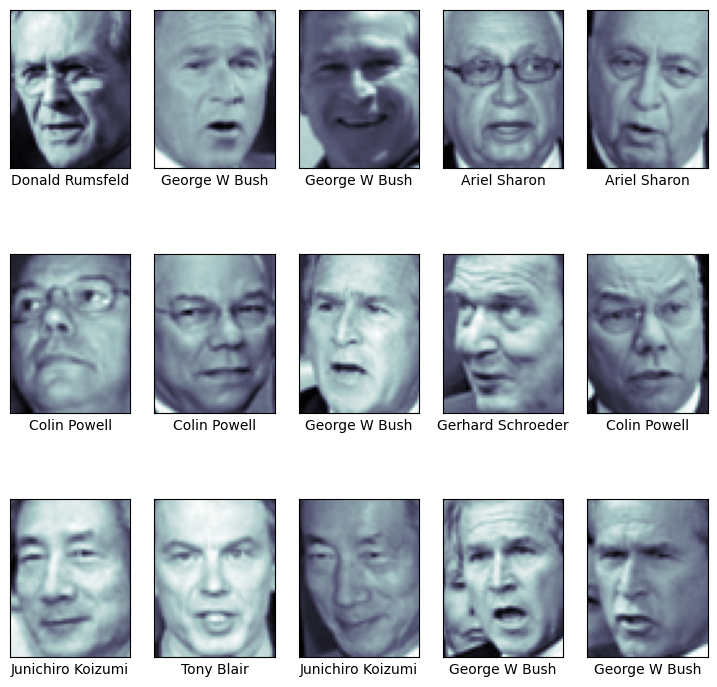

In [4]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Ядро poly

In [7]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='poly')

model = make_pipeline(pca, svc)

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 1min 41s
Wall time: 23.6 s
{'svc__C': 50}


In [10]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Correct Labels in green, incorrect Labels in Red')

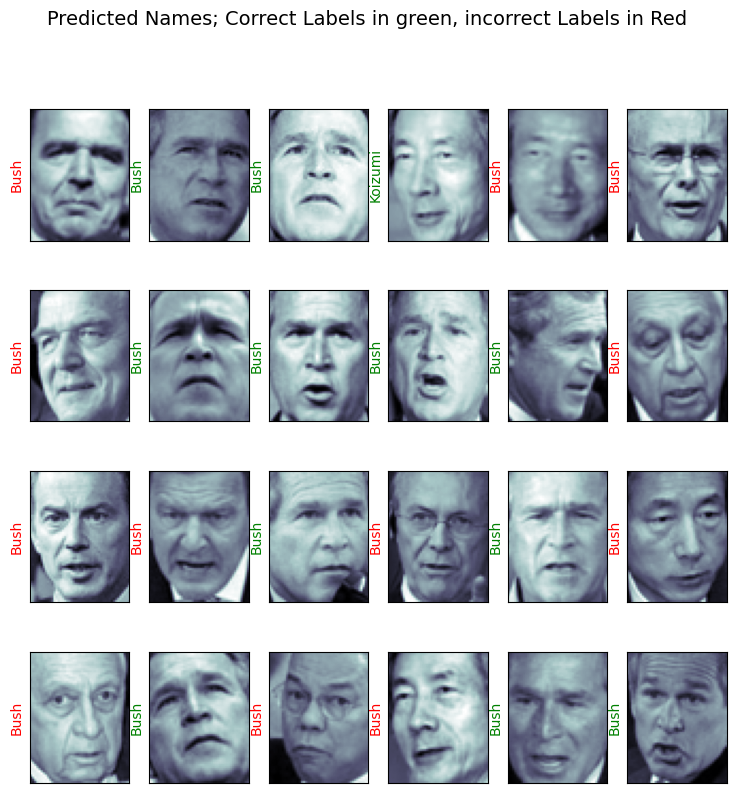

In [12]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='green' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Correct Labels in green, incorrect Labels in Red', size=14)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.23      0.38        13
     Colin Powell       1.00      0.11      0.19        66
  Donald Rumsfeld       0.50      0.03      0.06        30
    George W Bush       0.46      0.99      0.63       139
Gerhard Schroeder       1.00      0.04      0.08        24
Junichiro Koizumi       1.00      0.18      0.30        17
       Tony Blair       1.00      0.10      0.18        31

         accuracy                           0.49       320
        macro avg       0.85      0.24      0.26       320
     weighted avg       0.72      0.49      0.37       320



Text(72.7222222222222, 0.5, 'predicted label')

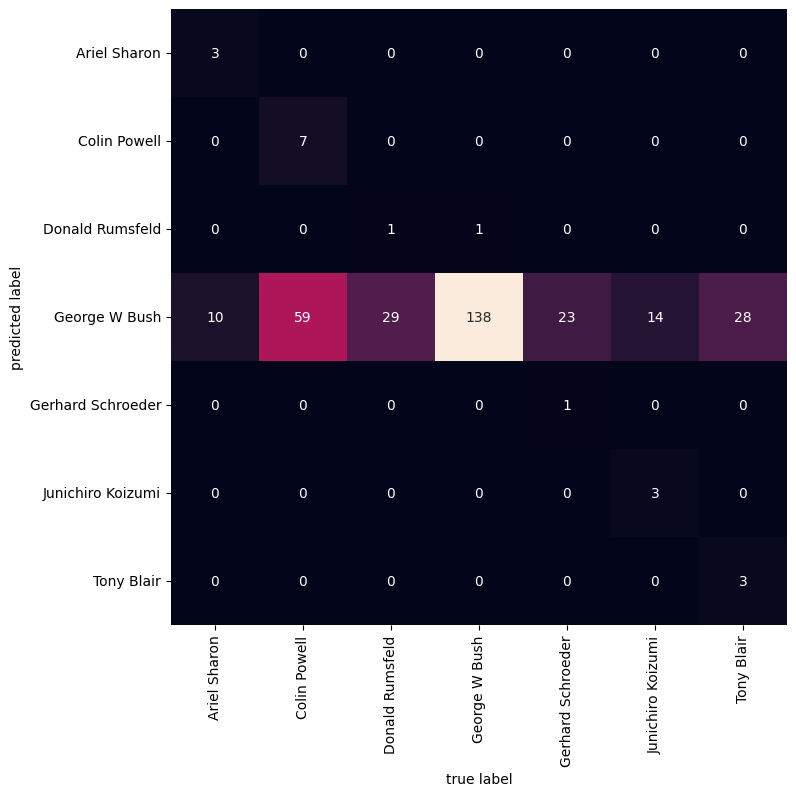

In [14]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
# все стали Бушем

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.4875

### Ядро rbf

In [17]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

yfit = model.predict(Xtest)

CPU times: total: 1min 47s
Wall time: 25.2 s
{'svc__C': 5}


Text(0.5, 0.98, 'Predicted Names; Correct Labels in green, incorrect Labels in Red')

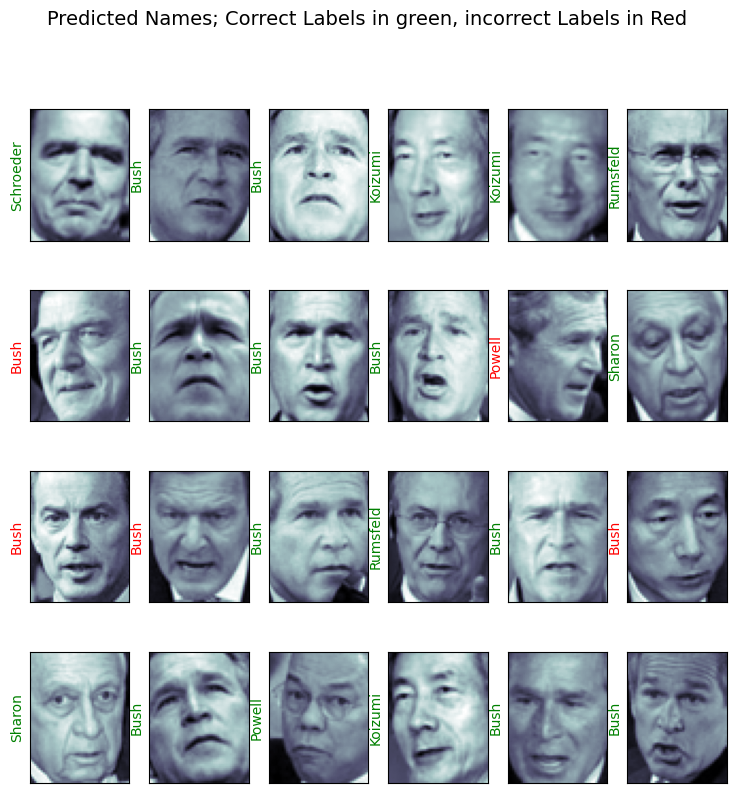

In [18]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='green' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Correct Labels in green, incorrect Labels in Red', size=14)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.46      0.60        13
     Colin Powell       0.81      0.86      0.84        66
  Donald Rumsfeld       1.00      0.60      0.75        30
    George W Bush       0.78      0.96      0.86       139
Gerhard Schroeder       0.94      0.62      0.75        24
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.92      0.74      0.82        31

         accuracy                           0.83       320
        macro avg       0.90      0.72      0.78       320
     weighted avg       0.85      0.83      0.82       320



Text(72.7222222222222, 0.5, 'predicted label')

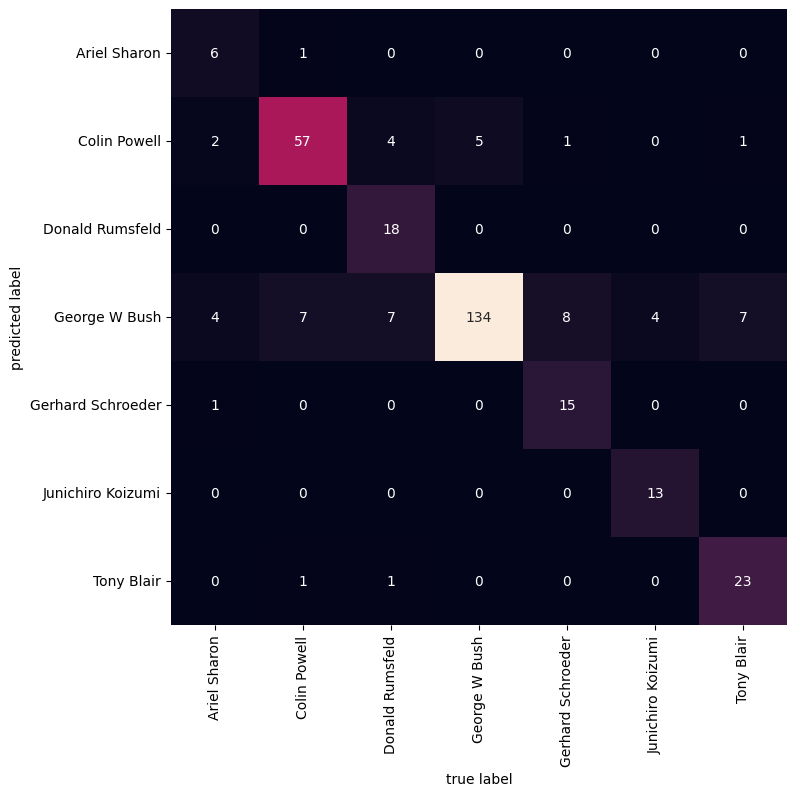

In [20]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.83125

### Ядро sigmoid

In [22]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='sigmoid')

model = make_pipeline(pca, svc)


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

model = grid.best_estimator_

yfit = model.predict(Xtest)

CPU times: total: 1min 43s
Wall time: 22.2 s
{'svc__C': 1}


Text(0.5, 0.98, 'Predicted Names; Correct Labels in green, incorrect Labels in Red')

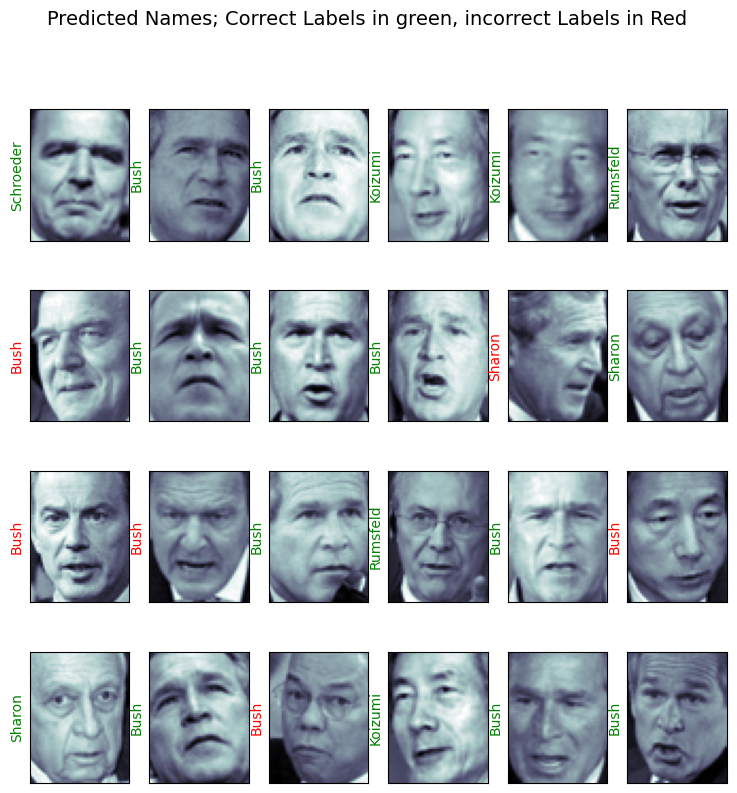

In [23]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='green' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Correct Labels in green, incorrect Labels in Red', size=14)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.38      0.43        13
     Colin Powell       0.73      0.77      0.75        66
  Donald Rumsfeld       0.75      0.60      0.67        30
    George W Bush       0.79      0.94      0.86       139
Gerhard Schroeder       0.88      0.62      0.73        24
Junichiro Koizumi       0.88      0.82      0.85        17
       Tony Blair       0.94      0.55      0.69        31

         accuracy                           0.78       320
        macro avg       0.78      0.67      0.71       320
     weighted avg       0.79      0.78      0.77       320



Text(72.7222222222222, 0.5, 'predicted label')

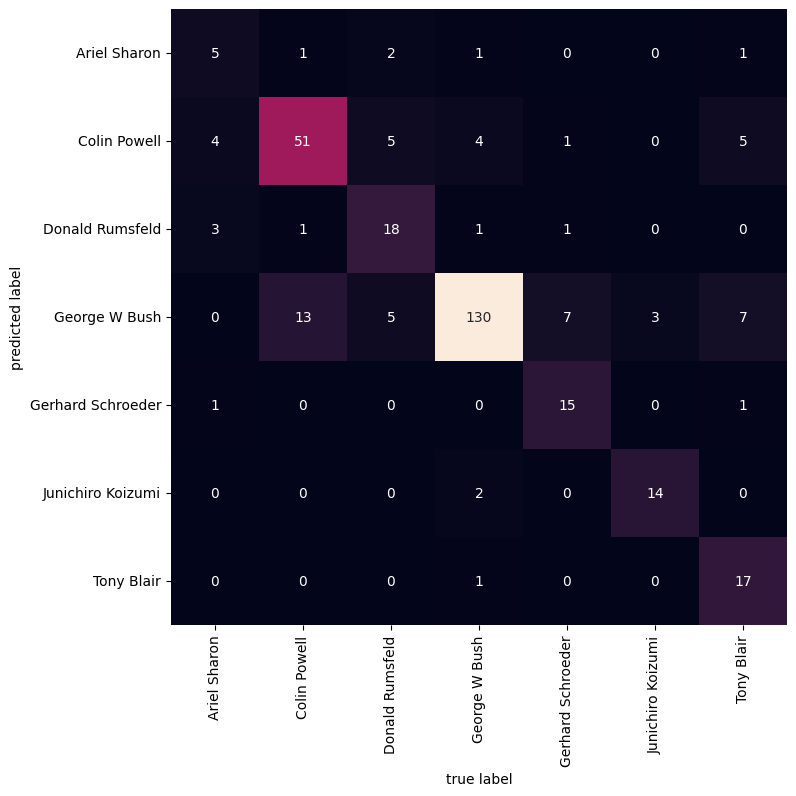

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.78125

ЛУЧШИЙ РЕЗУЛЬТАТ У RBF!

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [27]:
lr = LogisticRegression(class_weight='balanced')
model = make_pipeline(pca, lr) # объявляю модель

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

# подбираю параметр
param_grid = {'logisticregression__C': list(range(1, 20))}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 7min 45s
Wall time: 1min 35s
{'logisticregression__C': 1}


In [28]:
# обучение
model = grid.best_estimator_
yfit = model.predict(Xtest)


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.38      0.46      0.41        13
     Colin Powell       0.73      0.74      0.74        66
  Donald Rumsfeld       0.72      0.60      0.65        30
    George W Bush       0.89      0.85      0.87       139
Gerhard Schroeder       0.83      0.79      0.81        24
Junichiro Koizumi       0.76      0.94      0.84        17
       Tony Blair       0.71      0.81      0.76        31

         accuracy                           0.78       320
        macro avg       0.72      0.74      0.73       320
     weighted avg       0.79      0.78      0.79       320



Text(72.7222222222222, 0.5, 'predicted label')

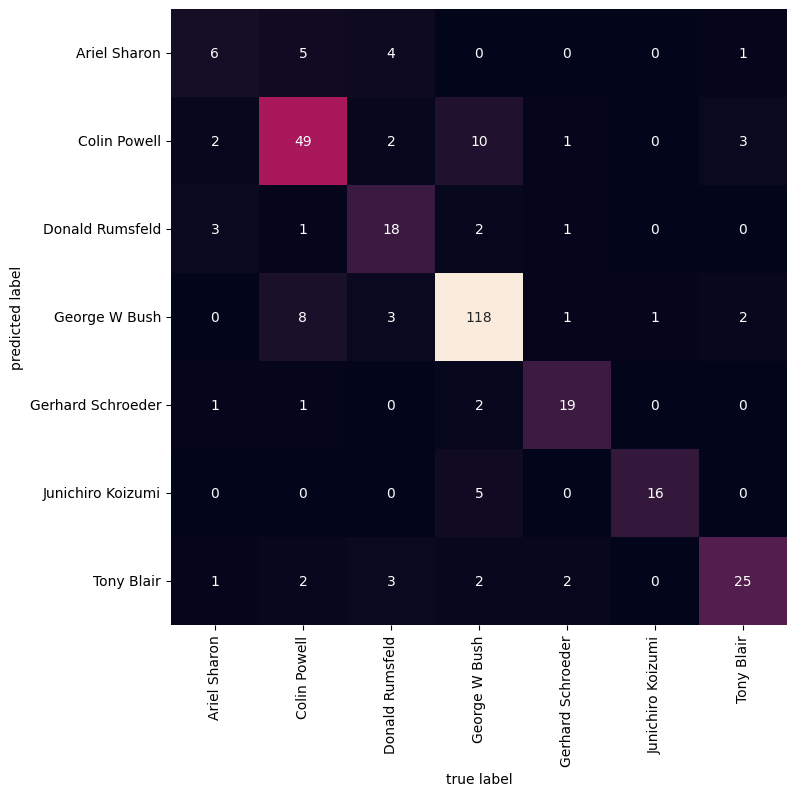

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit, ytest)

0.784375

Качество у этой модели лучше, чем у метода опорных векторов с ядрами poly и sigmoid, но уступает SVM с ядром rbf!

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [141]:
import pandas as pd

data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [143]:
set(data.type)

{'red', 'white'}

In [144]:
data.type = data.type.apply(lambda x: 1 if x == 'red' else 0) # теперь всё в цифрах

In [145]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [146]:
data = data.fillna(data.mean())

<Axes: >

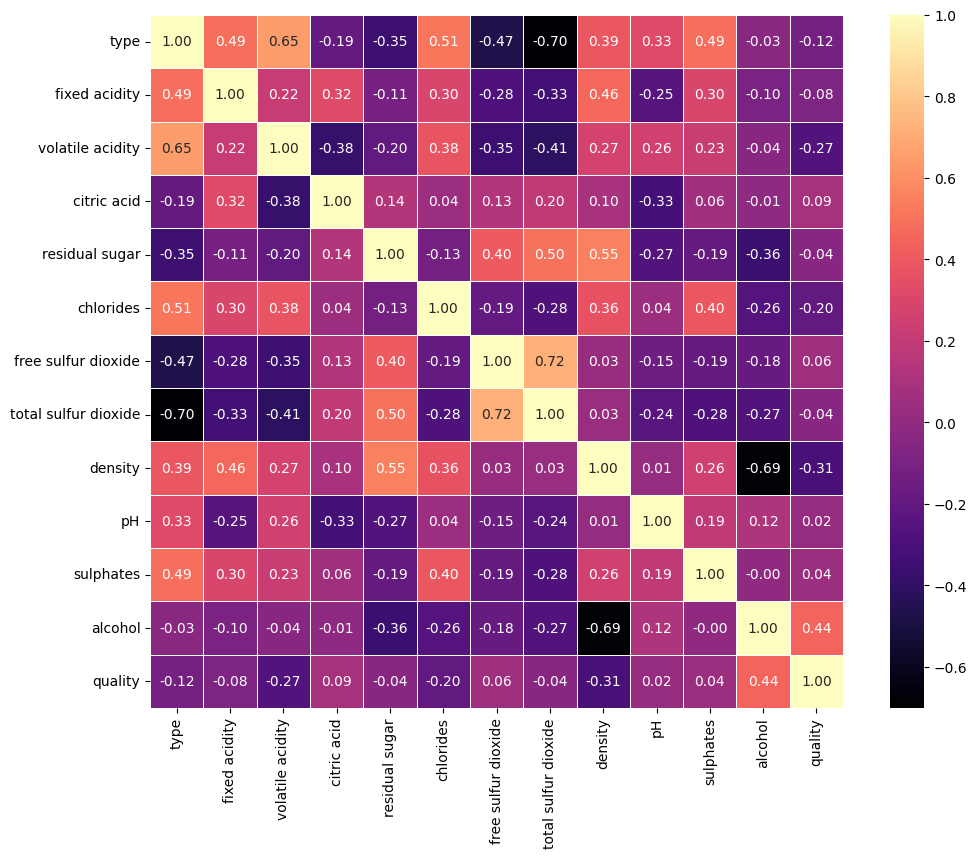

In [147]:
# корреляции признаков
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask = np.zeros_like(corr, dtype=bool), \
            cmap = sns.color_palette('magma', as_cmap=True), square=True)

In [148]:
# free sulfur dioxide и total sulfur dioxide сильно коррелируют друг с другом, но free больше коррелирует с целевой, поэтому я дропну total
data.drop(['total sulfur dioxide'], axis=1, inplace=True) 

In [149]:
X = data.copy().drop('quality', axis=1)
y = data['quality']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN Neighbours

In [150]:
def plotting(grid, params):
    """Функция для построения графиков"""
    scores_mean = grid.cv_results_['mean_test_score']
    scores_sd = grid.cv_results_['std_test_score']

    fig, ax = plt.subplots()
    ax.plot(params,scores_mean)
    ax.fill_between(params, (scores_mean-scores_sd), (scores_mean+scores_sd), color='g', alpha=.1)

In [151]:
from sklearn.metrics import make_scorer, balanced_accuracy_score

In [152]:
def model_train(model, param_grid, hyperparams):
    """Функция подбора гиперпараметров, вызывает функцию с графиками"""
    grid = GridSearchCV(model, param_grid, scoring='roc_auc')  
    grid.fit(Xtrain, ytrain)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')
    best = grid.best_estimator_ 
    y_pred_train = best.predict(Xtrain)
    y_pred_test = best.predict(Xtest)
    print(classification_report(ytrain, y_pred_train), classification_report(ytest, y_pred_test))
    print(roc_auc_score(ytrain, y_pred_train), roc_auc_score(ytest, y_pred_test))

In [153]:
model = KNeighborsClassifier()
hyperparams = list(range(2, 30)) # k=2 до k=30
param_grid = {'n_neighbors': hyperparams}

KNN results


d:\python39\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "d:\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
d:\python39\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  Fil

Best params: {'n_neighbors': 2}
              precision    recall  f1-score   support

           3       0.64      1.00      0.78        28
           4       0.64      0.97      0.77       170
           5       0.75      0.97      0.85      1718
           6       0.85      0.78      0.81      2257
           7       0.92      0.57      0.70       858
           8       1.00      0.43      0.60       161
           9       0.00      0.00      0.00         5

    accuracy                           0.80      5197
   macro avg       0.69      0.67      0.64      5197
weighted avg       0.82      0.80      0.80      5197
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.19      0.26      0.22        46
           5       0.52      0.72      0.60       420
           6       0.60      0.52      0.56       579
           7       0.52      0.29      0.37       221
           8       0.30      0.09      0.14   

d:\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: multi_class must be in ('ovo', 'ovr')

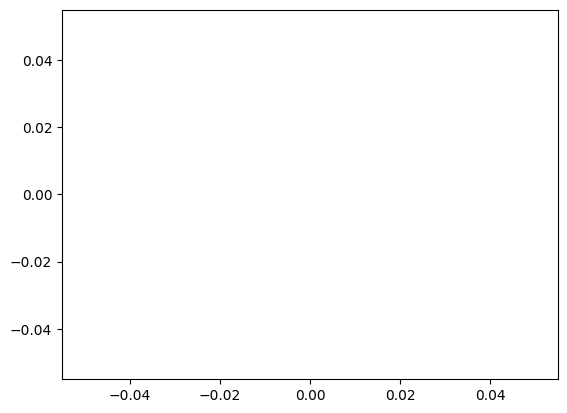

In [154]:
print('KNN results')
model_train(model, param_grid, hyperparams)

In [158]:
def model_train(model, param_grid, hyperparams):
    """Функция подбора гиперпараметров, вызывает функцию с графиками"""
    scorer = make_scorer(balanced_accuracy_score)
    grid = GridSearchCV(model, param_grid, scoring=scorer)  # почитала про те ошибки и поменяла scoring в этой функции
    grid.fit(Xtrain, ytrain)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')
    best = grid.best_estimator_ # версия модели, которая лучше обучилась
    y_pred_train = best.predict(Xtrain)
    y_pred_test = best.predict(Xtest)
    print(classification_report(ytrain, y_pred_train, zero_division=0), classification_report(ytest, y_pred_test, zero_division=0))
    print(accuracy_score(ytrain, y_pred_train), accuracy_score(ytest, y_pred_test))


When true positive + false positive == 0, precision is undefined. When true positive + false negative == 0, recall is undefined. In such cases, by default the metric will be set to 0, as will f-score, and UndefinedMetricWarning will be raised. This behavior can be modified with zero_division.

Ещё добавила параметр zero_devision по этой причине ^

In [159]:
model = KNeighborsClassifier()
hyperparams = list(range(2, 30)) # k=2 до k=30
param_grid = {'n_neighbors': hyperparams}

KNN results
Best params: {'n_neighbors': 2}
              precision    recall  f1-score   support

           3       0.64      1.00      0.78        28
           4       0.64      0.97      0.77       170
           5       0.75      0.97      0.85      1718
           6       0.85      0.78      0.81      2257
           7       0.92      0.57      0.70       858
           8       1.00      0.43      0.60       161
           9       0.00      0.00      0.00         5

    accuracy                           0.80      5197
   macro avg       0.69      0.67      0.64      5197
weighted avg       0.82      0.80      0.80      5197
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.19      0.26      0.22        46
           5       0.52      0.72      0.60       420
           6       0.60      0.52      0.56       579
           7       0.52      0.29      0.37       221
           8       0.30      0.09 

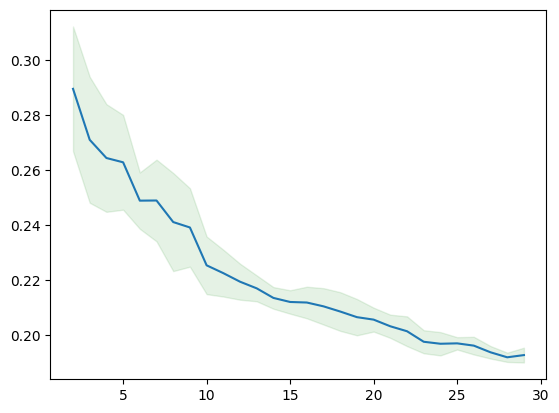

In [160]:
print('KNN results')
model_train(model, param_grid, hyperparams)

### Normalised KNN

In [161]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

hyperparams = list(range(2, 30))
param_grid = {'knn__n_neighbors': hyperparams}

Normalised KNN results
Best params: {'knn__n_neighbors': 2}
              precision    recall  f1-score   support

           3       0.70      1.00      0.82        28
           4       0.66      0.99      0.79       170
           5       0.76      0.97      0.85      1718
           6       0.86      0.78      0.82      2257
           7       0.92      0.62      0.74       858
           8       1.00      0.50      0.67       161
           9       0.00      0.00      0.00         5

    accuracy                           0.82      5197
   macro avg       0.70      0.69      0.67      5197
weighted avg       0.83      0.82      0.81      5197
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.24      0.37      0.29        46
           5       0.55      0.77      0.64       420
           6       0.64      0.54      0.58       579
           7       0.67      0.41      0.51       221
           8      

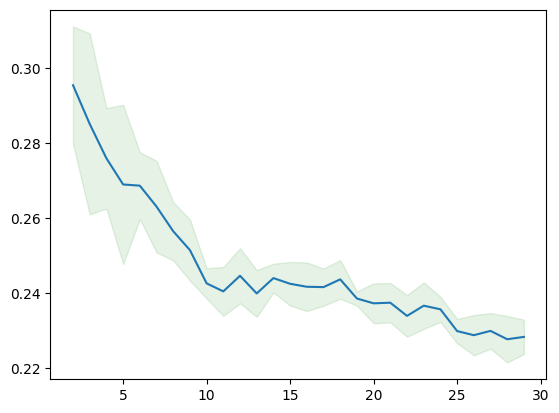

In [162]:
print('Normalised KNN results')
model_train(model, param_grid, hyperparams)

### SGDClassifier

In [163]:
model = SGDClassifier()
hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': hyperparams}

SGD results
Best params: {'loss': 'log_loss'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        28
           4       0.42      0.03      0.05       170
           5       0.57      0.48      0.52      1718
           6       0.62      0.00      0.00      2257
           7       0.22      0.94      0.35       858
           8       0.00      0.00      0.00       161
           9       0.00      0.00      0.00         5

    accuracy                           0.32      5197
   macro avg       0.26      0.21      0.13      5197
weighted avg       0.51      0.32      0.23      5197
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.11      0.18        46
           5       0.56      0.49      0.52       420
           6       0.67      0.00      0.01       579
           7       0.22      0.94      0.36       221
           8       0.00      0.0

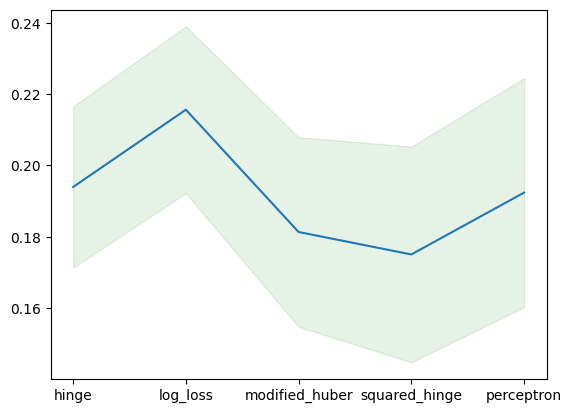

In [164]:
print('SGD results')
model_train(model, param_grid, hyperparams) # результат не очень, но зато без переобучения!

### Normalised SGD

In [183]:
# был такой warning ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter
# поэтому я увеличила max_iter
model = Pipeline([
    ('scale', StandardScaler()),
    ('sgd', SGDClassifier(max_iter=7000)) 
])
hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'sgd__loss': hyperparams}

Normalised SGD results
Best params: {'sgd__loss': 'log_loss'}
              precision    recall  f1-score   support

           3       0.50      0.04      0.07        28
           4       0.00      0.00      0.00       170
           5       0.53      0.67      0.59      1718
           6       0.51      0.56      0.53      2257
           7       0.40      0.26      0.32       858
           8       0.00      0.00      0.00       161
           9       0.00      0.00      0.00         5

    accuracy                           0.51      5197
   macro avg       0.28      0.22      0.22      5197
weighted avg       0.47      0.51      0.48      5197
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.02      0.04        46
           5       0.52      0.70      0.60       420
           6       0.51      0.53      0.52       579
           7       0.41      0.25      0.31       221
           8    

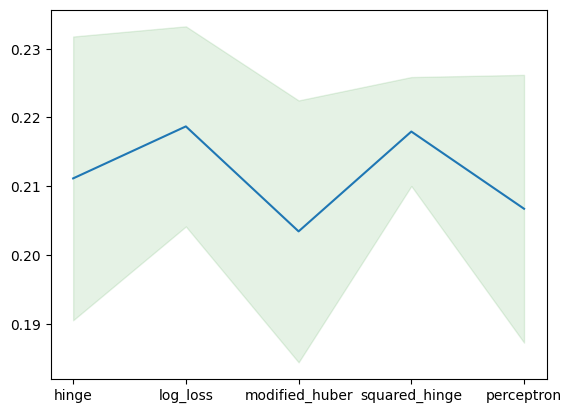

In [184]:
print('Normalised SGD results')
model_train(model, param_grid, hyperparams) # кажется получше всё

### LinearSVC

Сначала я попробовала SVC, но модель слишком долго обучалась, поэтому я решила взять LinearSVC

In [185]:
from sklearn.svm import LinearSVC

In [192]:
param_grid = {
    'C': [0.1, 1, 10],
}
 
svm = LinearSVC(random_state=0, tol=1e-5, verbose=3, max_iter=10000, dual=False)
 
grid_search = GridSearchCV(
    estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
 
grid_search.fit(Xtrain, ytrain)
 
print('Best Hyperparameters: ', grid_search.best_params_)
print(f'Best Accuracy Score: {(grid_search.best_score_ * 100)}')
 
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(Xtest, ytest)
print(f'Test Accuracy: {(test_accuracy * 100)}')

[LibLinear]Best Hyperparameters:  {'C': 0.1}
Best Accuracy Score: 53.04977048937588
Test Accuracy: 52.61538461538462


### LogisticRegression

In [218]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)
 
# гиперпараметры
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs']
}
 
logistic_regression = LogisticRegression(max_iter=1000)
 
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, ytrain)
 
# лучшие гиперпараметры
best_params = grid_search.best_params_
 
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, ytrain)

accuracy = best_model.score(X_test_scaled, ytest)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy on test set: {accuracy:.2f}')

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on test set: 0.54


### DecisionTreeClassifier

In [233]:
# подумала ещё попробовать деревья...

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=13)
dt.fit(Xtrain, ytrain)
y_pred_dt = dt.predict(Xtest)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, ytest):.2f}")

Decision tree accuracy: 0.60


In [230]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

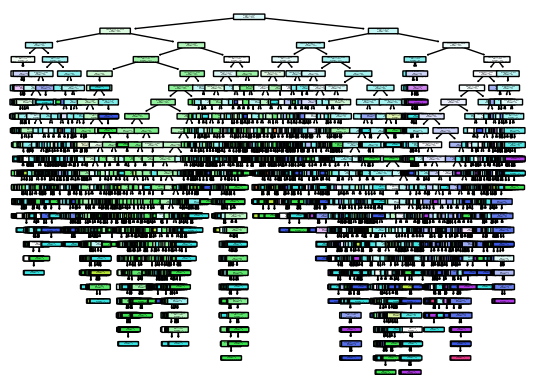

In [229]:
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show() # ой-ой

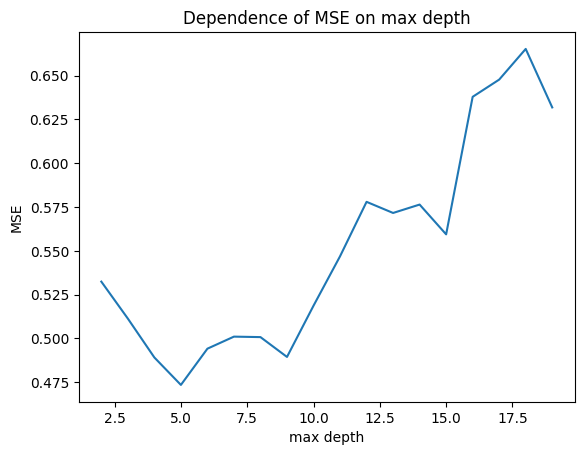

In [235]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt.fit(Xtrain, ytrain)
    mse_array.append(mean_squared_error(ytest, dt.predict(Xtest)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [236]:
pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,alcohol,0.245889
1,volatile acidity,0.129351
2,free sulfur dioxide,0.098983
3,residual sugar,0.091738
4,citric acid,0.082038
5,sulphates,0.081938
6,pH,0.076627
7,chlorides,0.073894
8,fixed acidity,0.060753
9,density,0.055980


В общем, подводя итог, результаты везде были так себе, лучшие показатели у логистической регрессии, LinearSVC, и у нормализованного SGD. У деревьев вроде бы ещё лучше, но я не уверена в том, что смогла правильно оценить этот результат...